In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv("/content/reduced_dataset.csv")

In [3]:
X = df.drop('num', axis=1)

In [4]:
from sklearn.cluster import KMeans

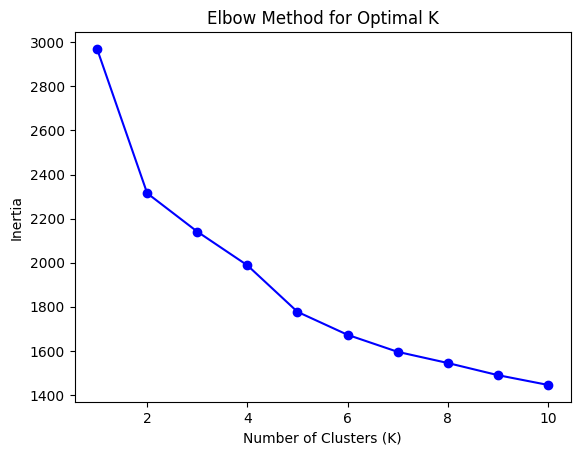

In [5]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, 'bo-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal K')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=6, random_state=42)  # مثلًا لو اخترت 2 مجموعات
df['Cluster'] = kmeans.fit_predict(X)

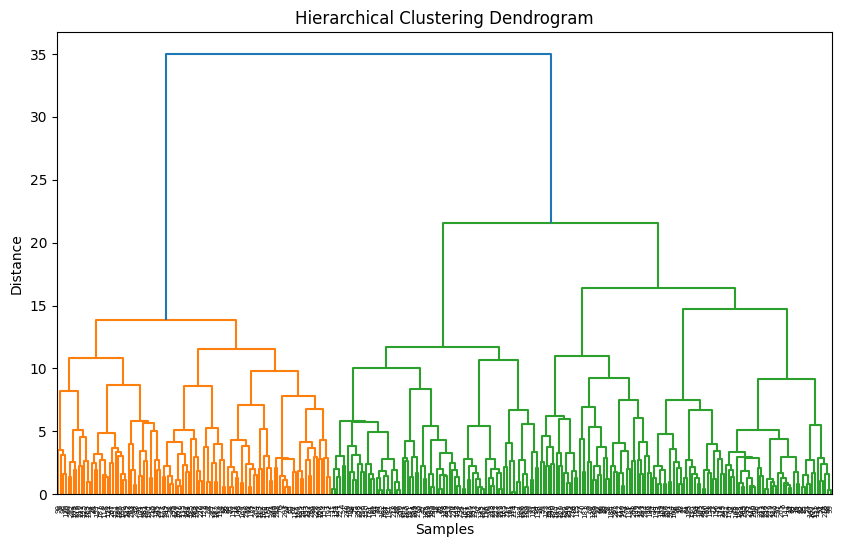

In [7]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z = linkage(X, method='ward')
plt.figure(figsize=(10, 6))
dendrogram(Z)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Distance')
plt.show()

In [8]:
from scipy.cluster.hierarchy import fcluster

clusters = fcluster(Z, t=2, criterion='maxclust')  # 2 معناها عدد الكلاسترز
df['Cluster'] = clusters

In [10]:
df['num_binary'] = df['num'].apply(lambda x: 1 if x > 0 else 0)

In [18]:
from sklearn.metrics import confusion_matrix, adjusted_rand_score

print(confusion_matrix(df['num_binary'], df['Cluster']))
print("ARI Score:", adjusted_rand_score(df['num_binary'], df['Cluster']))

[[  0  10 150]
 [  0  95  42]
 [  0   0   0]]
ARI Score: 0.4202028530023914
